In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Income dataset

In [2]:
income = pd.read_csv('data/happyscore_income.csv')
income.head()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia


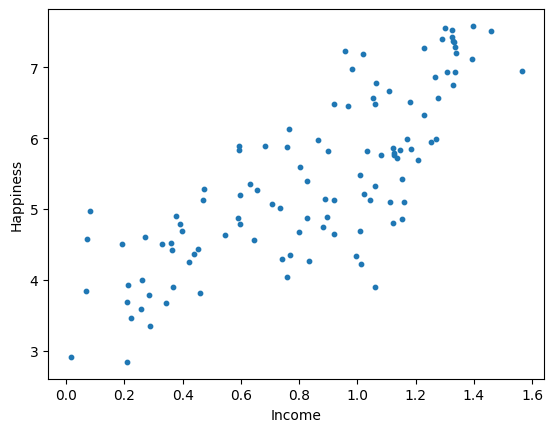

In [3]:
f ,ax = plt.subplots()
ax.scatter(income['GDP'],income['happyScore'], s= 10)
ax.set_xlabel('Income')
ax.set_ylabel('Happiness')
plt.show()

## Ordenada = 0

In [4]:
x,y = income['GDP'].values,income['happyScore'].values
x.shape, y.shape

((111,), (111,))

In [5]:
x = x.reshape((-1,1))
y = y.reshape((-1,1))

In [6]:
x.shape

(111, 1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((88, 1), (23, 1), (88, 1), (23, 1))

In [9]:
b = np.dot(np.dot(X_train.T,X_train)**(-1), np.dot(X_train.T,y_train))

In [10]:
b.shape, b

((1, 1), array([[5.6574323]]))

In [11]:
xspace = np.linspace(0,2,100)
y_hat =  (xspace * b).reshape((100,1))

In [12]:
y_hat.shape, xspace.shape

((100, 1), (100,))

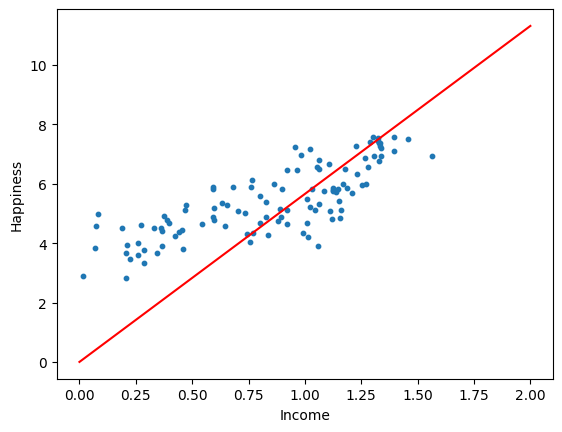

In [13]:
fig, ax = plt.subplots()
ax.scatter(x,y,s=10)
ax.plot(xspace,y_hat, color='red')

ax.set_xlabel('Income')
ax.set_ylabel('Happiness')
plt.show()

$y = b x$

In [14]:
b

array([[5.6574323]])

In [15]:
lr_income = LinearRegression(fit_intercept=False)

In [16]:
lr_income.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [17]:
lr_income.intercept_

0.0

In [18]:
lr_income.coef_[0]

array([5.6574323])

In [19]:
lr_income.score(X_train,y_train), lr_income.score(X_test,y_test)

(-0.7292949781706897, -1.1626700052739545)

## Ordenada $\neq$ 0

In [20]:
ones_column = np.ones((X_train.shape[0], 1))
X_train_v2 = np.hstack((ones_column, X_train))

np.dot(np.dot(np.linalg.inv(np.dot(X_train_v2.T, X_train_v2)), X_train_v2.T), y_train)

array([[3.35945976],
       [2.40726542]])

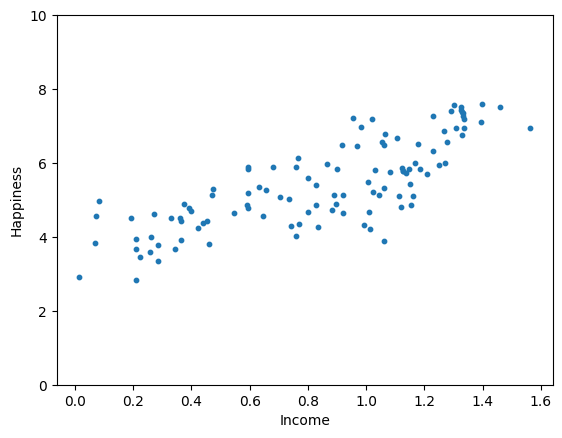

In [21]:
f ,ax = plt.subplots()
ax.scatter(x,y, s=10)
ax.set_ylim(0,10)
ax.set_xlabel('Income')
ax.set_ylabel('Happiness')
plt.show()

In [22]:
lr_inc2 = LinearRegression(fit_intercept=True)

In [23]:
lr_inc2.fit(X_train,y_train)

LinearRegression()

In [24]:
lr_inc2.coef_, lr_inc2.intercept_

(array([[2.40726542]]), array([3.35945976]))

In [25]:
y_pred = lr_inc2.predict(X_test)

In [26]:
yhat2 = lr_inc2.predict(xspace.reshape(-1,1))

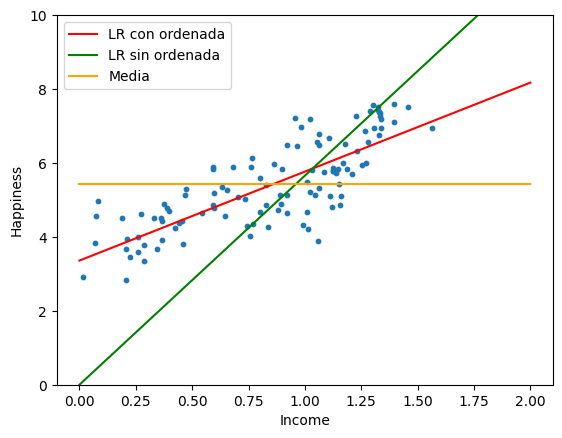

In [27]:
f ,ax = plt.subplots()
ax.scatter(x,y,s=10)
ax.plot(xspace,yhat2, color='red', label='LR con ordenada')
ax.plot(xspace,y_hat, color='green', label='LR sin ordenada')
ax.plot(xspace,np.mean(y)*np.ones(xspace.shape[0]), color='orange', label='Media')

ax.set_ylim(0,10)

ax.set_xlabel('Income')
ax.set_ylabel('Happiness')
plt.legend()
plt.show()

**Coeficiente de determinación $R^2$**

In [28]:
lr_income.score(X_test,y_test)

-1.1626700052739545

In [29]:
lr_inc2.score(X_test,y_test)

0.6125917892334227

# Possum

<img src='data/dataset-cover.jpg'>

In [30]:
df = pd.read_csv('data/possum.csv')

In [31]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


Para este ejemplo, solo conservaremos variables numéricas y el indicador de género.

In [32]:
df = df.loc[:,'sex':]

In [33]:
df.head()

,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


# Preprocessing

## Valores faltantes

In [34]:
df.isna().sum()

sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [35]:
len(df)

104

In [36]:
df = df[df.isna().sum(axis=1) == 0]
### o df.dropna(inplace=True) también es válido

In [37]:
len(df)

101

In [38]:
df.isna().sum()

sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

# One hot encoding

In [39]:
df.describe()

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,3.821782,92.730693,56.960396,87.269307,37.049505,68.398020,48.133663,15.050495,27.064356,32.638614
std,1.915182,3.518714,3.102679,4.196802,1.971681,4.413502,4.060352,1.058643,2.020722,2.727745
min,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,41.300000,12.800000,22.000000,25.000000
25%,2.000000,90.700000,55.000000,84.500000,36.000000,64.500000,44.800000,14.400000,25.500000,31.000000
50%,3.000000,92.900000,56.400000,88.000000,37.000000,67.900000,46.800000,14.900000,27.000000,32.500000
75%,5.000000,94.800000,58.100000,90.000000,38.000000,72.500000,52.000000,15.700000,28.000000,34.000000
max,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [40]:
df1 = pd.get_dummies(data=df, columns = ['sex'], drop_first=True)

In [41]:
df1

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,sex_m
0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,True
1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,False
2,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,False
3,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,False
4,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,False
...,...,...,...,...,...,...,...,...,...,...,...
99,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0,True
100,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0,True
101,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0,False
102,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0,True


In [42]:
columnas = [col for col in df1.columns if ((col != 'sex_m') & (col != 'totlngth'))]

In [43]:
columnas

['age',
 'hdlngth',
 'skullw',
 'taill',
 'footlgth',
 'earconch',
 'eye',
 'chest',
 'belly']

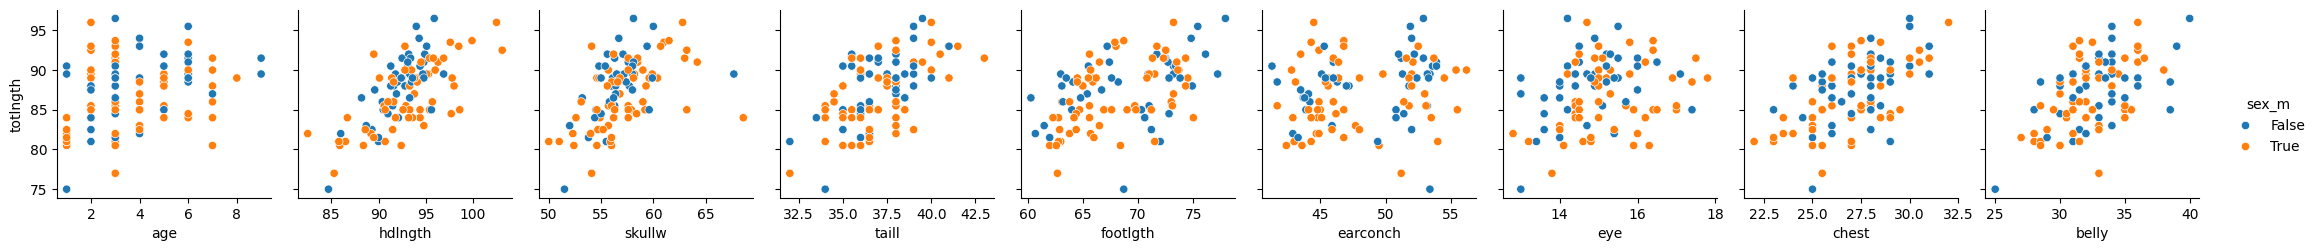

In [44]:
sns.pairplot(df1, hue='sex_m',x_vars=columnas,y_vars='totlngth')
plt.show()

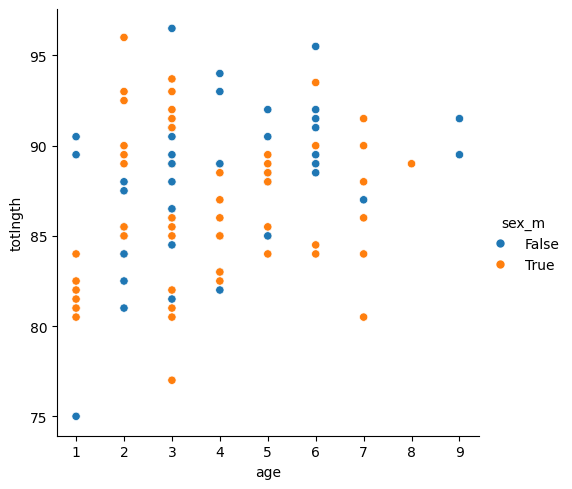

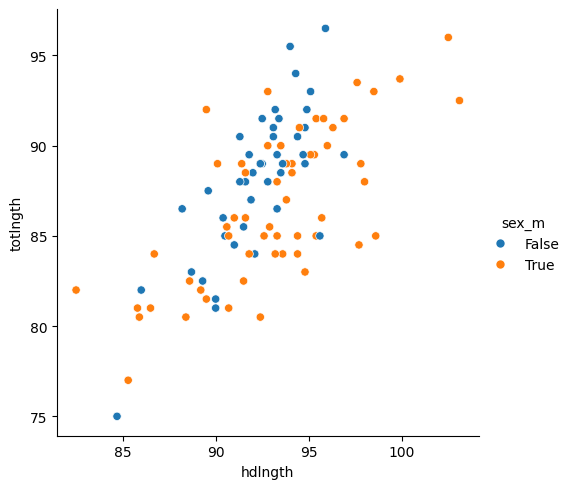

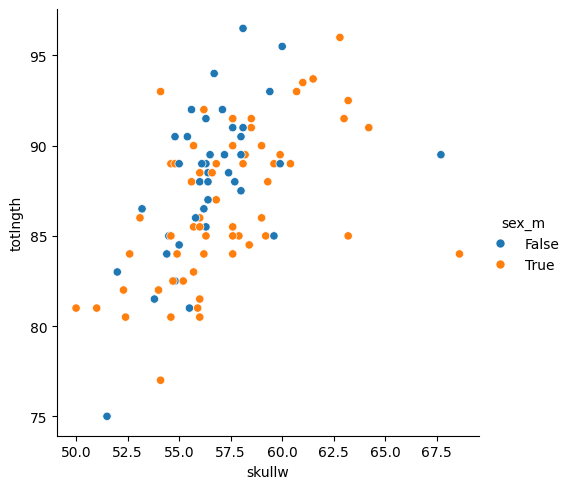

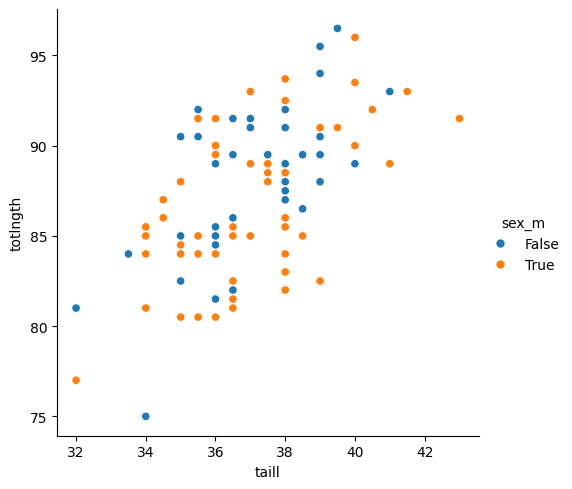

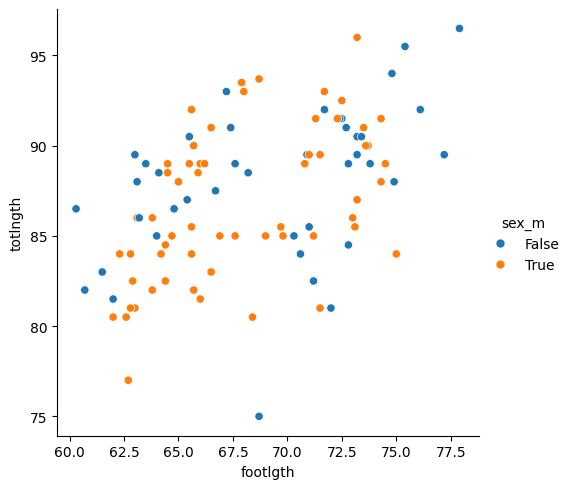

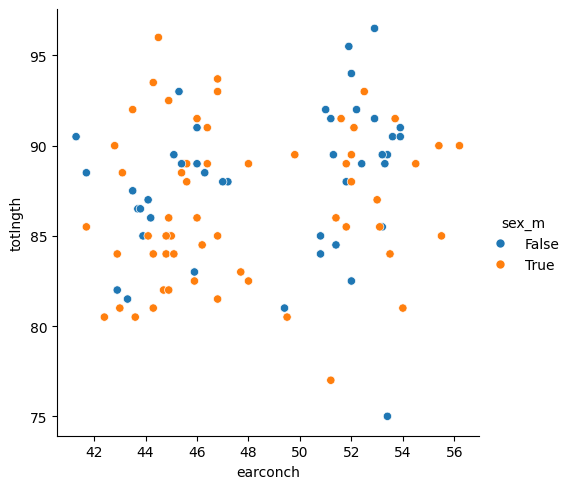

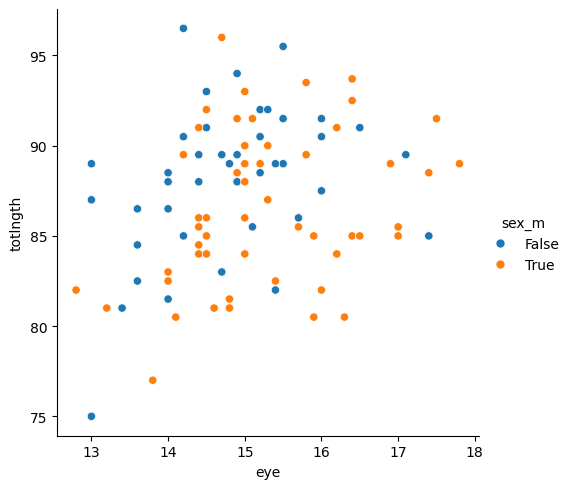

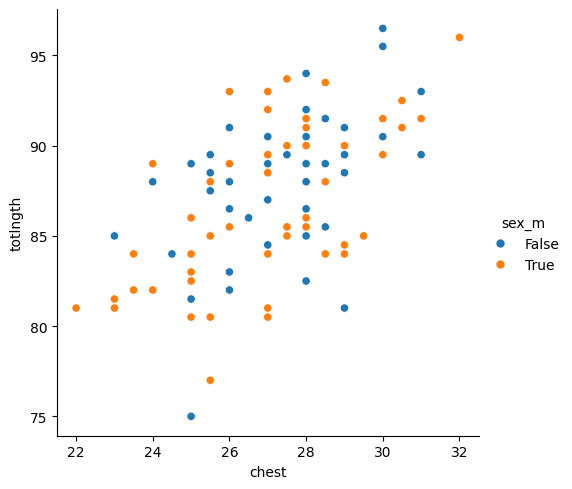

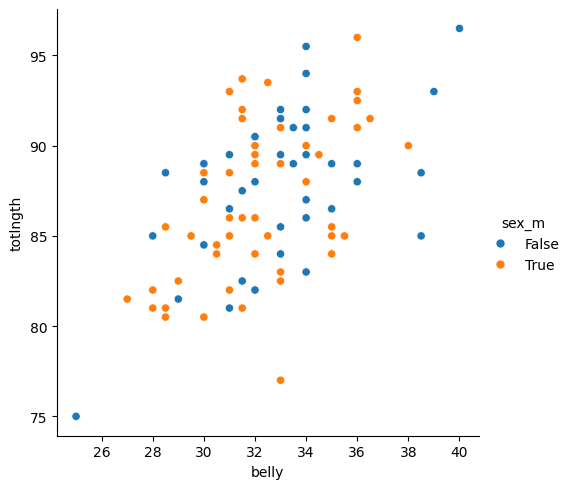

In [45]:
for columna in columnas:
    sns.relplot(x=columna,y='totlngth',hue='sex_m', data=df1)

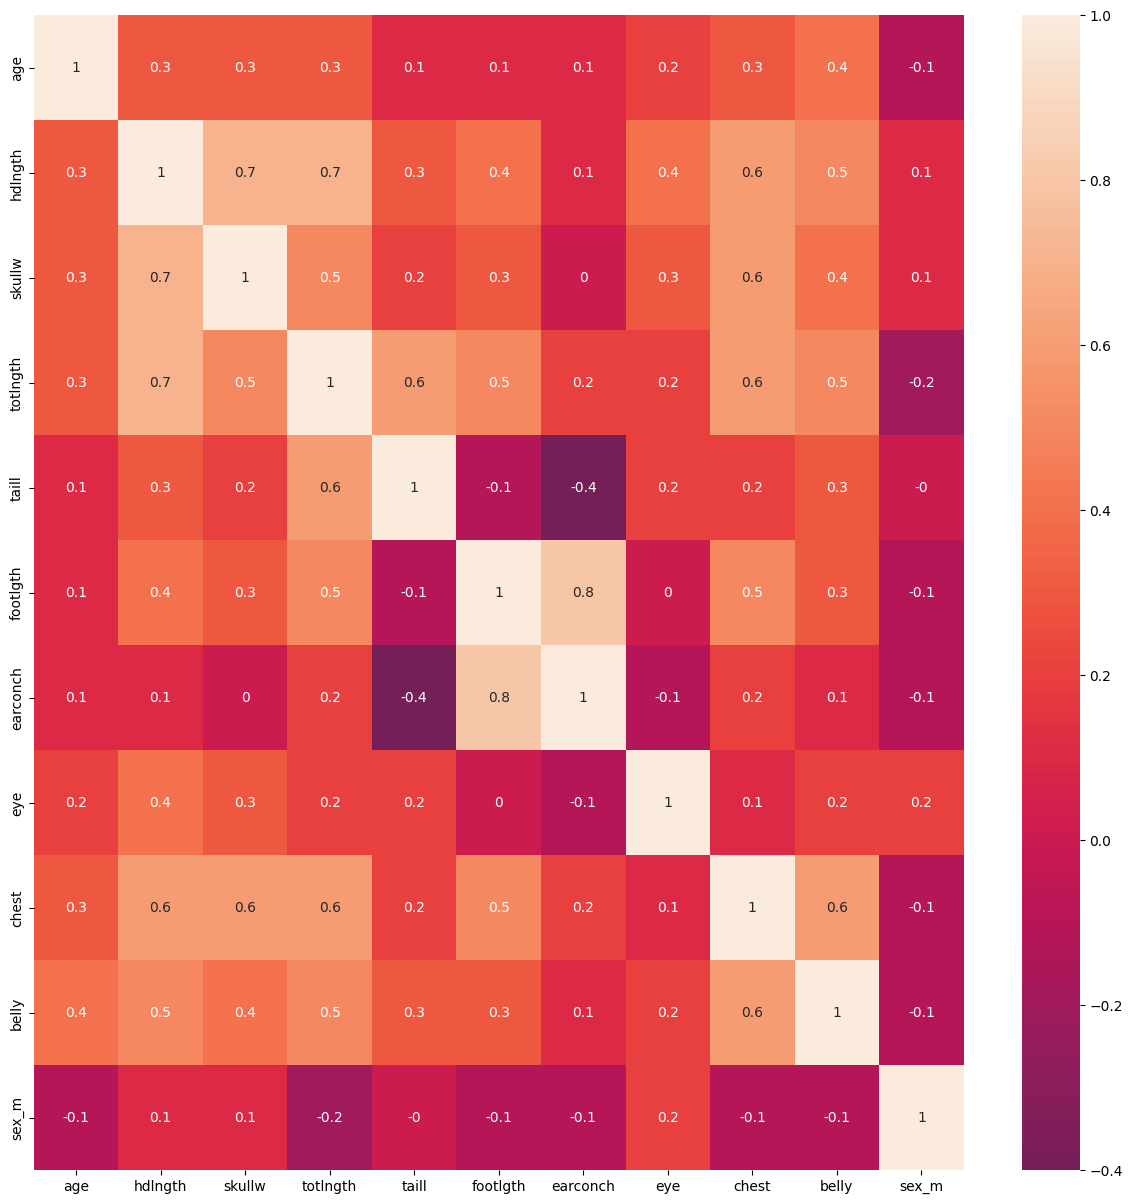

In [46]:
# Correlación

corr = df1.corr().round(1)
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap="rocket", center=0)
plt.show()

### Train test split (ojo, en realidad debe hacerse antes de observar correlaciones! lo veremos más adelante en Fuga de Datos)
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('totlngth', axis=1),
                                             df1['totlngth'].values.reshape(-1,1),
                                             test_size=0.2,
                                             random_state=12,
                                             )

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 10), (21, 10), (80, 1), (21, 1))

In [49]:
X_train

,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly,sex_m
57,3.0,94.5,64.2,39.0,66.5,46.4,14.4,30.5,33.0,True
26,2.0,90.5,54.5,35.0,70.3,50.8,14.2,23.0,28.0,False
58,2.0,102.5,62.8,40.0,73.2,44.5,14.7,32.0,36.0,True
19,4.0,94.8,56.3,38.0,73.8,52.4,15.5,27.0,36.0,False
61,3.0,91.3,58.0,39.0,65.5,41.3,16.0,27.0,32.0,False
...,...,...,...,...,...,...,...,...,...,...
3,6.0,93.2,57.1,38.0,76.1,52.2,15.2,28.0,34.0,False
2,6.0,94.0,60.0,39.0,75.4,51.9,15.5,30.0,34.0,False
6,2.0,95.3,58.2,36.0,71.5,52.0,14.2,30.0,34.5,True
27,4.0,93.8,56.8,34.5,73.2,53.0,15.3,27.0,30.0,True


# Regresión lineal

## Con ordenada

In [50]:
lr = LinearRegression()

In [51]:
lr.fit(X_train,y_train)

LinearRegression()

In [52]:
y_pred=lr.predict(X_test)

In [53]:
lr.coef_, lr.intercept_

(array([[-0.04544521,  0.46672365,  0.02040652,  1.08575708,  0.24245142,
          0.07539314,  0.05433787,  0.15685274, -0.02220651, -1.48460082]]),
 array([-21.01633948]))

In [54]:
lr.score(X_train,y_train), lr.score(X_test,y_test)

(0.7405102420675851, 0.7312422522217747)

In [57]:
from sklearn.metrics import mean_squared_error

RMSE_train = mean_squared_error(y_train, lr.predict(X_train))
RMSE_test = mean_squared_error(y_test, y_pred)

print('RMSE en el conjunto de entrenamiento: {}'.format(round(RMSE_train, 2)))
print('RMSE en el conjunto de prueba: {}'.format(round(RMSE_test, 2)))


RMSE en el conjunto de entrenamiento: 4.95
RMSE en el conjunto de prueba: 2.83


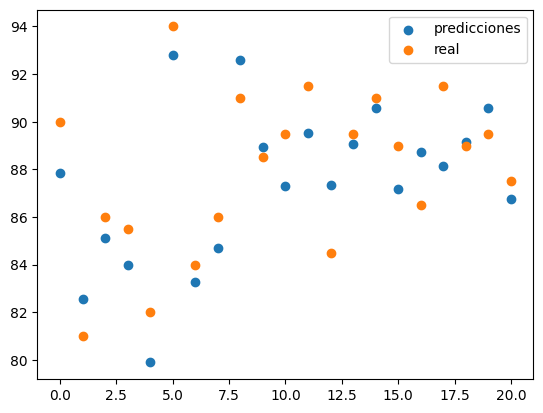

In [ ]:
x=range(len(y_test))
plt.scatter(x, y=y_pred, label='predicciones')
plt.scatter(x, y=y_test, label='real')
plt.legend()
plt.show()

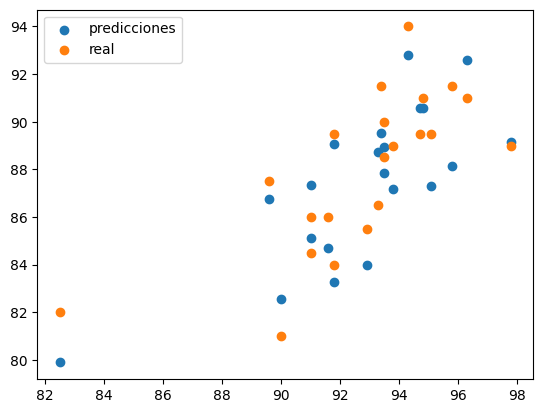

In [ ]:
plt.scatter(X_test['hdlngth'], y_pred, label='predicciones')
plt.scatter(X_test['hdlngth'], y_test, label='real')
plt.legend()
plt.show()

In [ ]:
coeficientes=pd.DataFrame(data=lr.coef_.T, index=X_train.columns, columns=['coeficiente'])
coeficientes.sort_values(by='coeficiente', ascending=False)

,coeficiente
taill,1.085757
hdlngth,0.466724
footlgth,0.242451
chest,0.156853
earconch,0.075393
eye,0.054338
skullw,0.020407
belly,-0.022207
age,-0.045445
sex_m,-1.484601
